In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
taxi_jan_2019 = pd.read_parquet('/content/drive/MyDrive/Training/data/yellow_tripdata_2019-01.parquet')
taxi_data = pd.concat([taxi_jan_2019])

In [4]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [5]:
taxi_data.shape

(7696617, 19)

##Data Exploration

In [6]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [7]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [8]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

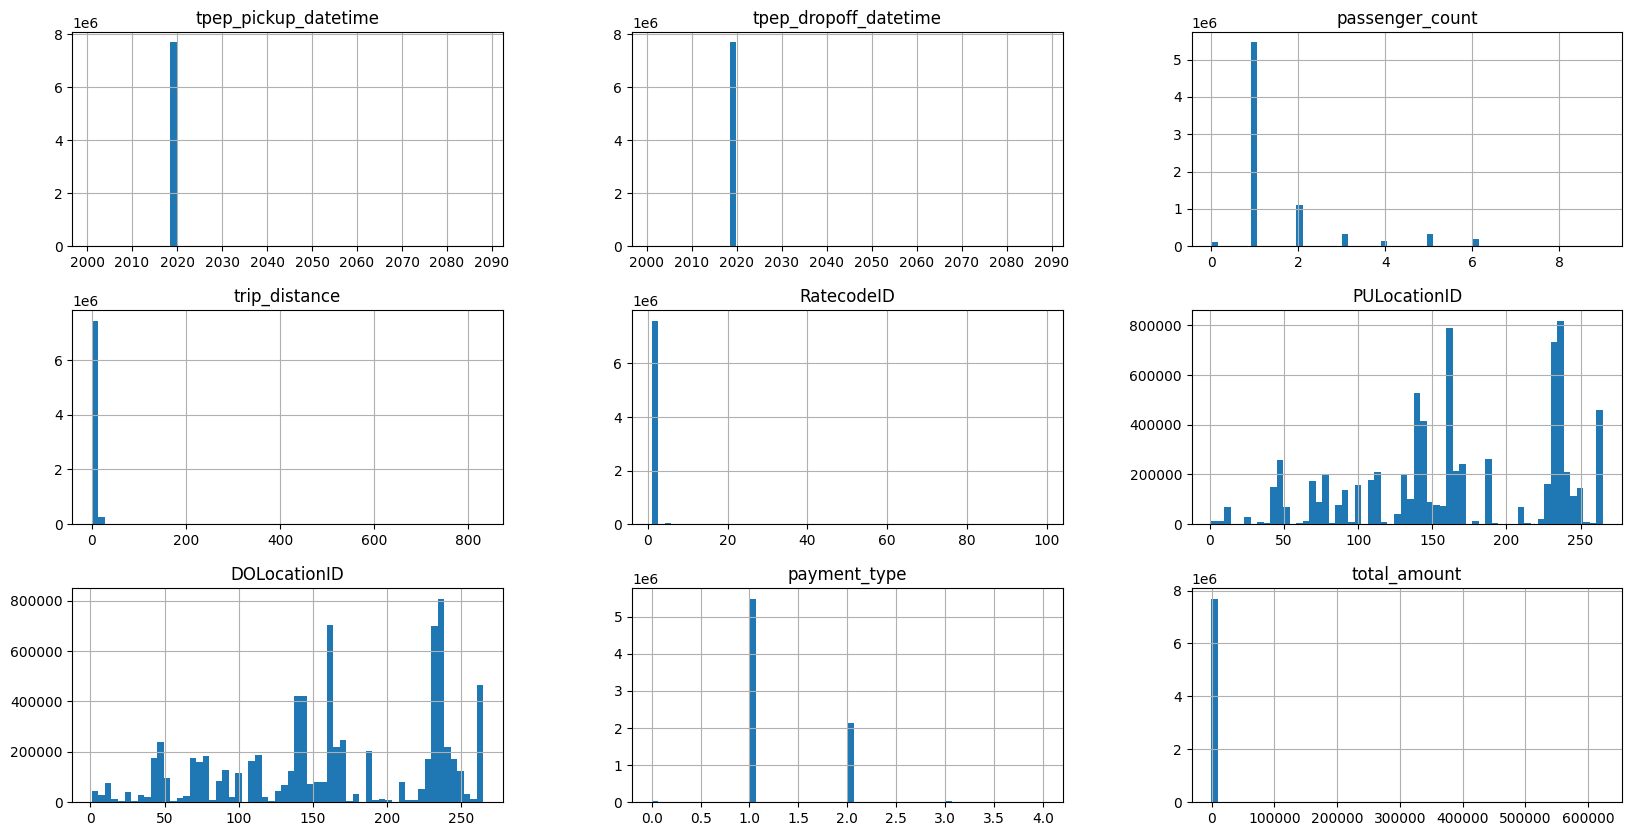

In [9]:
taxi_data.hist(figsize=(20,10), bins=60)

In [10]:
taxi_data['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,7430288
2.0,166093
5.0,54570
3.0,11801
4.0,4895
99.0,252
6.0,46


In [11]:
taxi_data['total_amount'].value_counts()

,count
total_amount,
7.30,170471
7.80,167914
6.80,167879
8.30,161705
8.80,159067
...,...
196.32,1
0.56,1
167.11,1


<Axes: xlabel='index', ylabel='total_amount'>

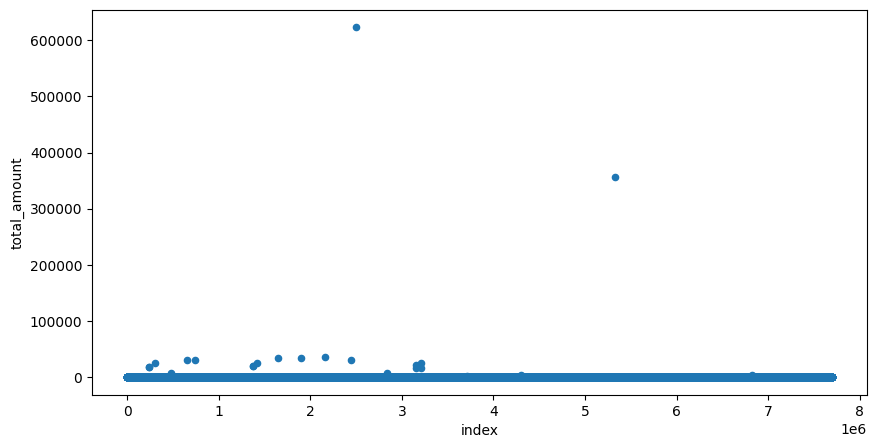

In [12]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

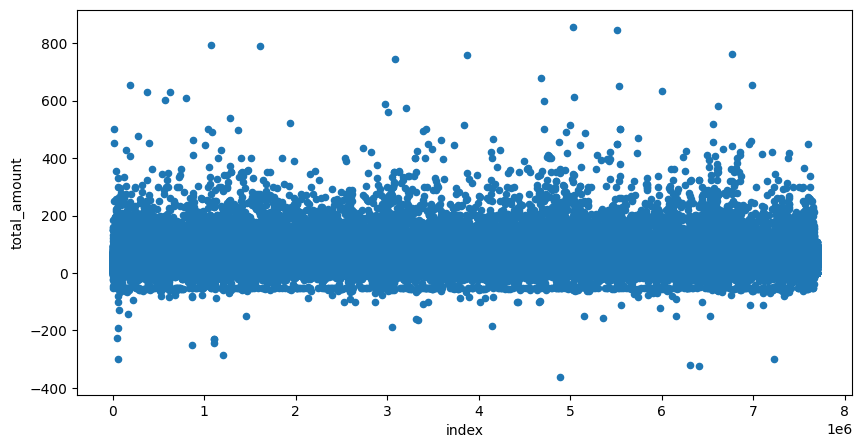

In [13]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: >

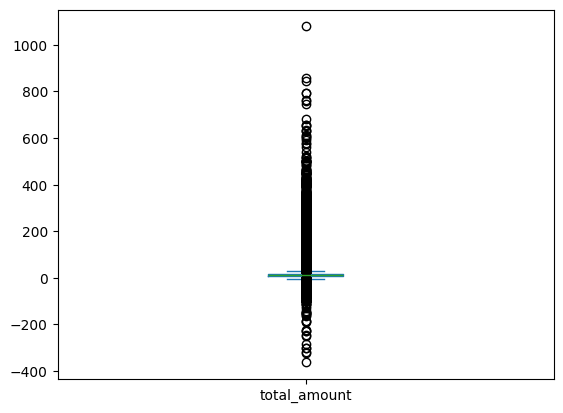

In [14]:
taxi_data[taxi_data['total_amount']<3000].reset_index().plot(kind='box', y='total_amount', x='index')

<Axes: xlabel='index', ylabel='total_amount'>

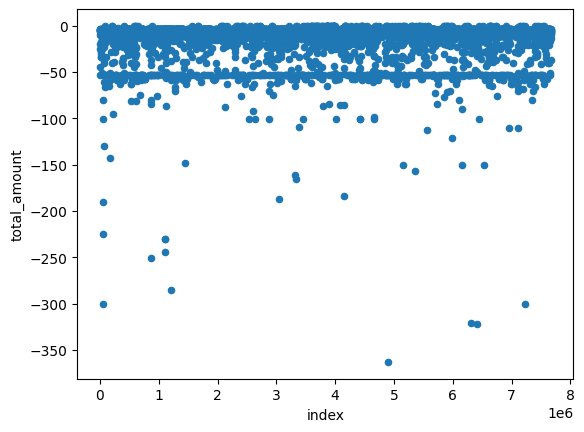

In [15]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index')

In [16]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [17]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

,count
payment_type,
3,4083
4,2667
2,376
1,1


<Axes: >

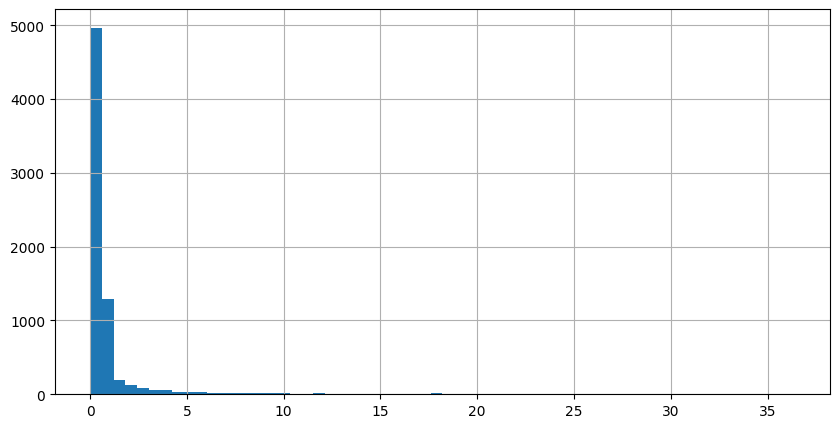

In [18]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [19]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [20]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

,count
payment_type,
1,813
2,569
0,231
3,29
4,1


<Axes: >

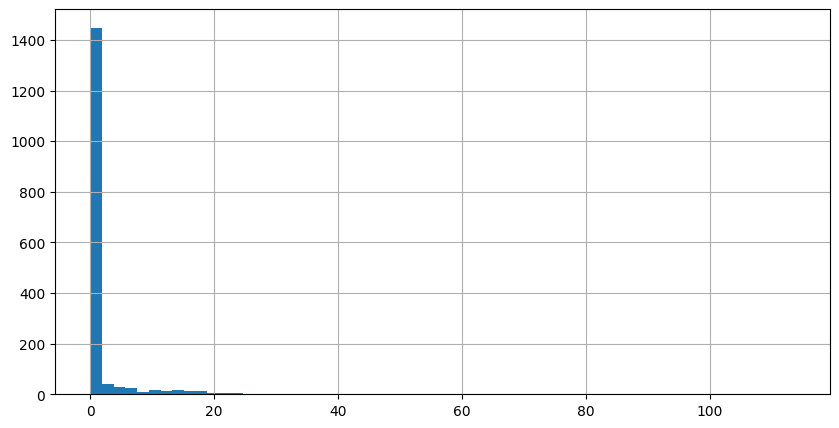

In [21]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [22]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

,count
trip_distance,
0.00,1323
0.03,9
0.01,8
0.06,6
1.00,4
...,...
11.86,1
4.59,1
20.92,1


In [23]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [24]:
taxi_data['total_amount'].mean()

15.810651344610214

In [25]:
taxi_data['total_amount'].median()

11.3

##Data Cleaning

In [26]:
#i filtered to data in order to have the total amount of the transaction more than 0 and less than 200
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>0) & (taxi_data['total_amount']<200)]

In [27]:
print(taxi_data_filtered.shape)
taxi_data.shape

(7686676, 9)


(7696617, 9)

In [28]:
#check if there are null values
taxi_data_filtered.isna().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,28441
trip_distance,0
RatecodeID,28441
PULocationID,0
DOLocationID,0
payment_type,0
total_amount,0


In [29]:
taxi_data_filtered.dropna()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.00,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.00,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.00,2.0,193,193,2,55.55
...,...,...,...,...,...,...,...,...,...
7667936,2019-01-31 23:04:25,2019-01-31 23:17:09,2.0,4.15,1.0,186,13,2,15.80
7667937,2019-01-31 23:32:34,2019-01-31 23:41:40,1.0,1.34,1.0,68,233,2,9.30
7667938,2019-01-31 23:47:48,2019-02-01 00:01:08,1.0,1.45,1.0,161,229,1,14.16
7667939,2019-01-31 23:31:54,2019-01-31 23:50:36,2.0,4.28,1.0,186,262,1,21.96


In [30]:
taxi_data_filtered2 = taxi_data_filtered.dropna()

In [31]:
taxi_data_filtered2.isna().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
total_amount,0


##Data preparation

In [32]:
taxi_data_preparared = taxi_data_filtered2.copy()

In [33]:
taxi_data_preparared.dtypes

,0
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
PULocationID,int64
DOLocationID,int64
payment_type,int64
total_amount,float64


In [46]:
taxi_data_preparared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_preparared['tpep_pickup_datetime'])
taxi_data_preparared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_preparared['tpep_dropoff_datetime'])

In [43]:
taxi_data_preparared.loc[:,'RatecodeID'] = taxi_data_preparared['RatecodeID'].astype(str)
taxi_data_preparared.loc[:,'PULocationID'] = taxi_data_preparared['PULocationID'].apply(str)
taxi_data_preparared.loc[:,'DOLocationID'] = taxi_data_preparared['DOLocationID'].apply(str)
taxi_data_preparared.loc[:,'payment_type'] = taxi_data_preparared['payment_type'].apply(str)

In [48]:
taxi_data_preparared.dtypes

,0
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,object
PULocationID,object
DOLocationID,object
payment_type,object
total_amount,float64


In [45]:
taxi_data_preparared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151.0,239.0,1.0,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239.0,246.0,1.0,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236.0,236.0,1.0,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193.0,193.0,2.0,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193.0,193.0,2.0,55.55


In [49]:
taxi_data_preparared['transaction_date'] = pd.to_datetime(taxi_data_preparared['tpep_pickup_datetime']).dt.date
taxi_data_preparared['transaction_year'] = pd.to_datetime(taxi_data_preparared['tpep_pickup_datetime']).dt.year
taxi_data_preparared['transaction_month'] = pd.to_datetime(taxi_data_preparared['tpep_pickup_datetime']).dt.month
taxi_data_preparared['transaction_day'] = pd.to_datetime(taxi_data_preparared['tpep_pickup_datetime']).dt.day
taxi_data_preparared['transaction_hour'] = pd.to_datetime(taxi_data_preparared['tpep_pickup_datetime']).dt.hour

In [50]:
taxi_data_preparared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151.0,239.0,1.0,9.95,2019-01-01,2019.0,1.0,1.0,0.0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239.0,246.0,1.0,16.30,2019-01-01,2019.0,1.0,1.0,0.0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236.0,236.0,1.0,5.80,2018-12-21,2018.0,12.0,21.0,13.0
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193.0,193.0,2.0,7.55,2018-11-28,2018.0,11.0,28.0,15.0
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193.0,193.0,2.0,55.55,2018-11-28,2018.0,11.0,28.0,15.0


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_year'}>],
       [<Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>,
        <Axes: title={'center': 'transaction_hour'}>]], dtype=object)

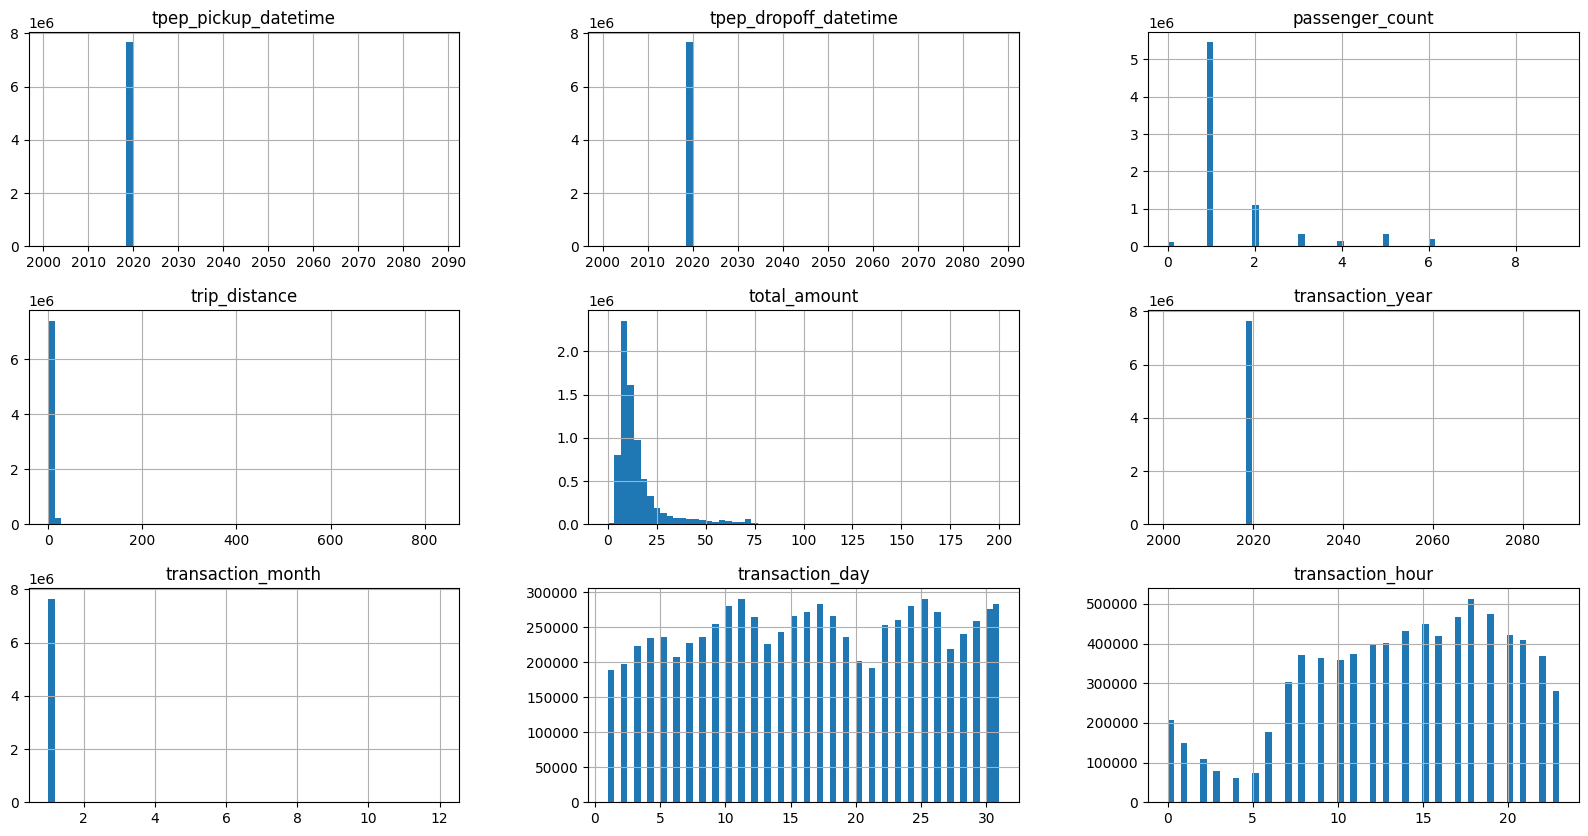

In [52]:
taxi_data_preparared.hist(figsize=(20,10), bins=60)

In [53]:
taxi_data_preparared = taxi_data_preparared[taxi_data_preparared['transaction_year']==2019]
taxi_data_preparared = taxi_data_preparared[taxi_data_preparared['transaction_month']==1]

##Problem definition
#I want to predict avg money that people spend for cab ride in a certain region in New York in a given hour in a day in a month


In [54]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
mumerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + mumerical_columns

In [55]:
main_taxi_df = taxi_data_preparared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7657703, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151.0,2019-01-01,1.0,1.0,0.0,1.5,9.95
1,239.0,2019-01-01,1.0,1.0,0.0,2.6,16.30
7,163.0,2019-01-01,1.0,1.0,0.0,1.3,9.05
8,229.0,2019-01-01,1.0,1.0,0.0,3.7,18.50
9,141.0,2019-01-01,1.0,1.0,0.0,2.1,13.00


In [56]:
#aggregate data points that has the same PULocationID and get the avg trip distance and total amount
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102461, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1.0,2019-01-01,1.0,1.0,2.0,0.0,21.800,1
1,1.0,2019-01-01,1.0,1.0,5.0,0.0,87.300,1
2,1.0,2019-01-01,1.0,1.0,6.0,0.0,80.300,1
3,1.0,2019-01-01,1.0,1.0,8.0,0.0,128.580,2
4,1.0,2019-01-01,1.0,1.0,10.0,16.9,43.245,4


Axes(0.125,0.11;0.775x0.77)


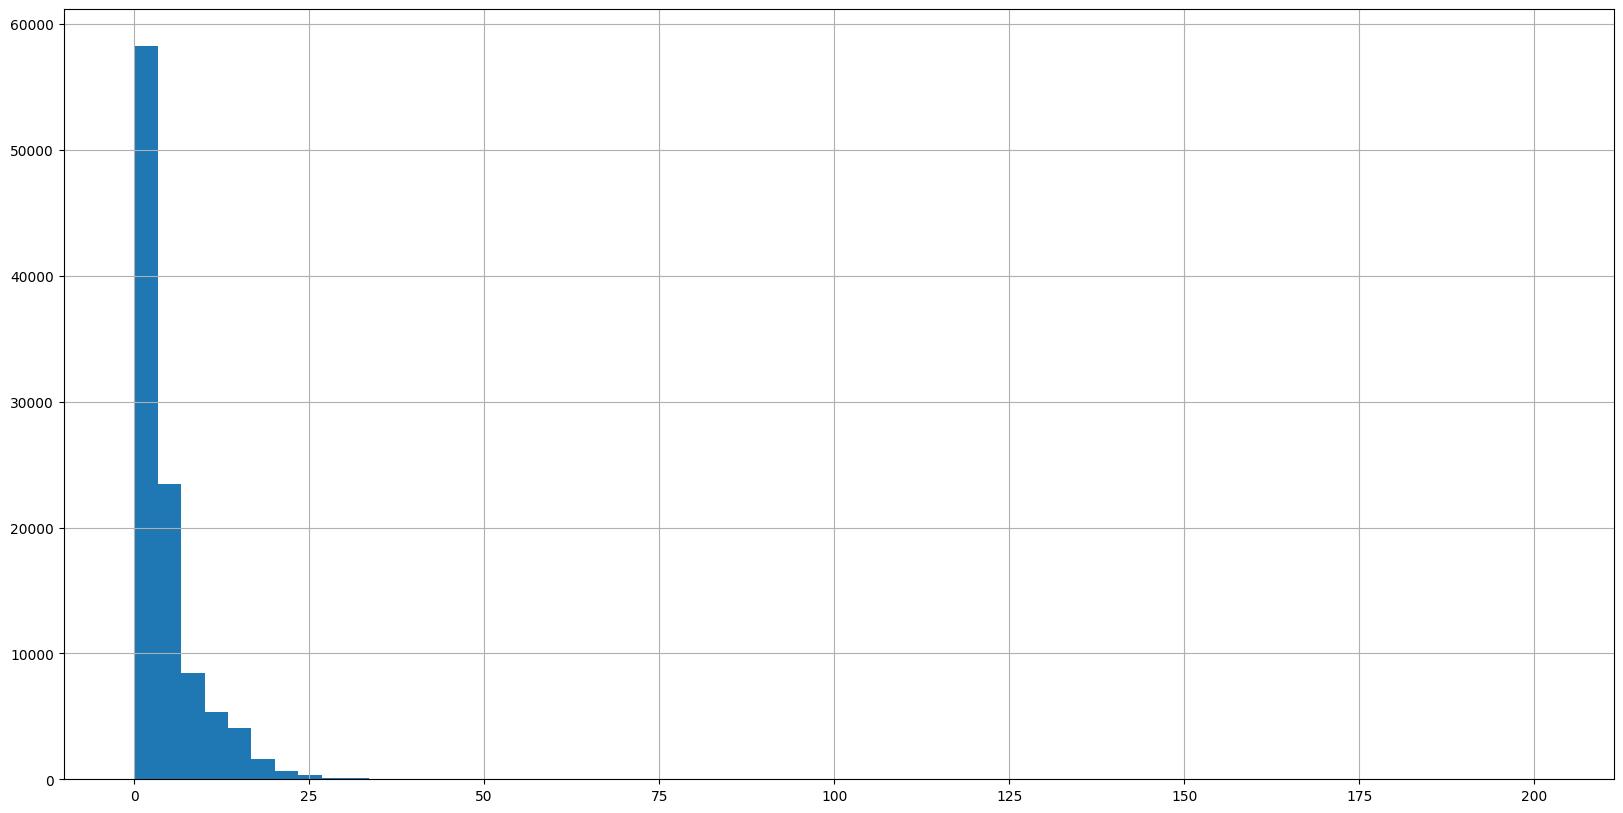

In [59]:
print(taxi_grouped_by_region['trip_distance'].hist(figsize=(20,10), bins=60))

<Axes: >

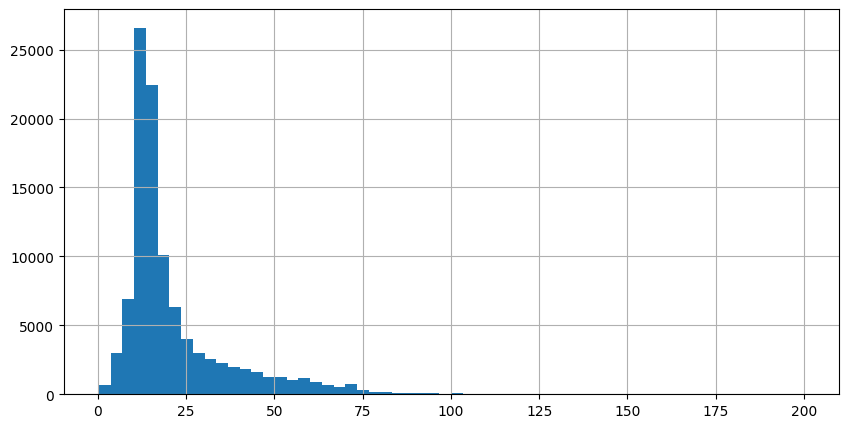

In [60]:
taxi_grouped_by_region['total_amount'].hist(figsize=(10,5), bins=60)

##Benchmark model

In [61]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [62]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_feature_benchmark = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'

In [63]:
# Train-test split
from sklearn.model_selection import train_test_split
X_bench = data_for_benchmark_model[input_feature_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]
# one-hot encode
X_bench = pd.get_dummies(X_bench)
X_train, X_test, y_train, y_test = train_test_split(X_bench, y_bench, test_size=0.20, random_state=42)

In [64]:
# fit a model to the data
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10)

##Evaluate the model

In [66]:
tree_model = tree

y_pred = tree_model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print('MSE: ', mean_squared_error(y_test, y_pred)) # avg of the squared difference between actual and predicted values, variance of the residuals
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred))) # standard deviation of residuals, more attention to bigger errors
print('MAE: ', mean_absolute_error(y_test, y_pred)) #avg of the absolute difference between the actual and predicted values
print('R2: ', r2_score(y_test, y_pred)) #between 0 and 1, how good a model fit the pattern of the data. 1 is perfect, negative is worst than the mean, 0 is the mean

MSE:  65.08344043227865
RMSE:  8.067430844592264
MAE:  3.366634942478787
R2:  0.7660793254874958


<Axes: xlabel='true', ylabel='pred'>

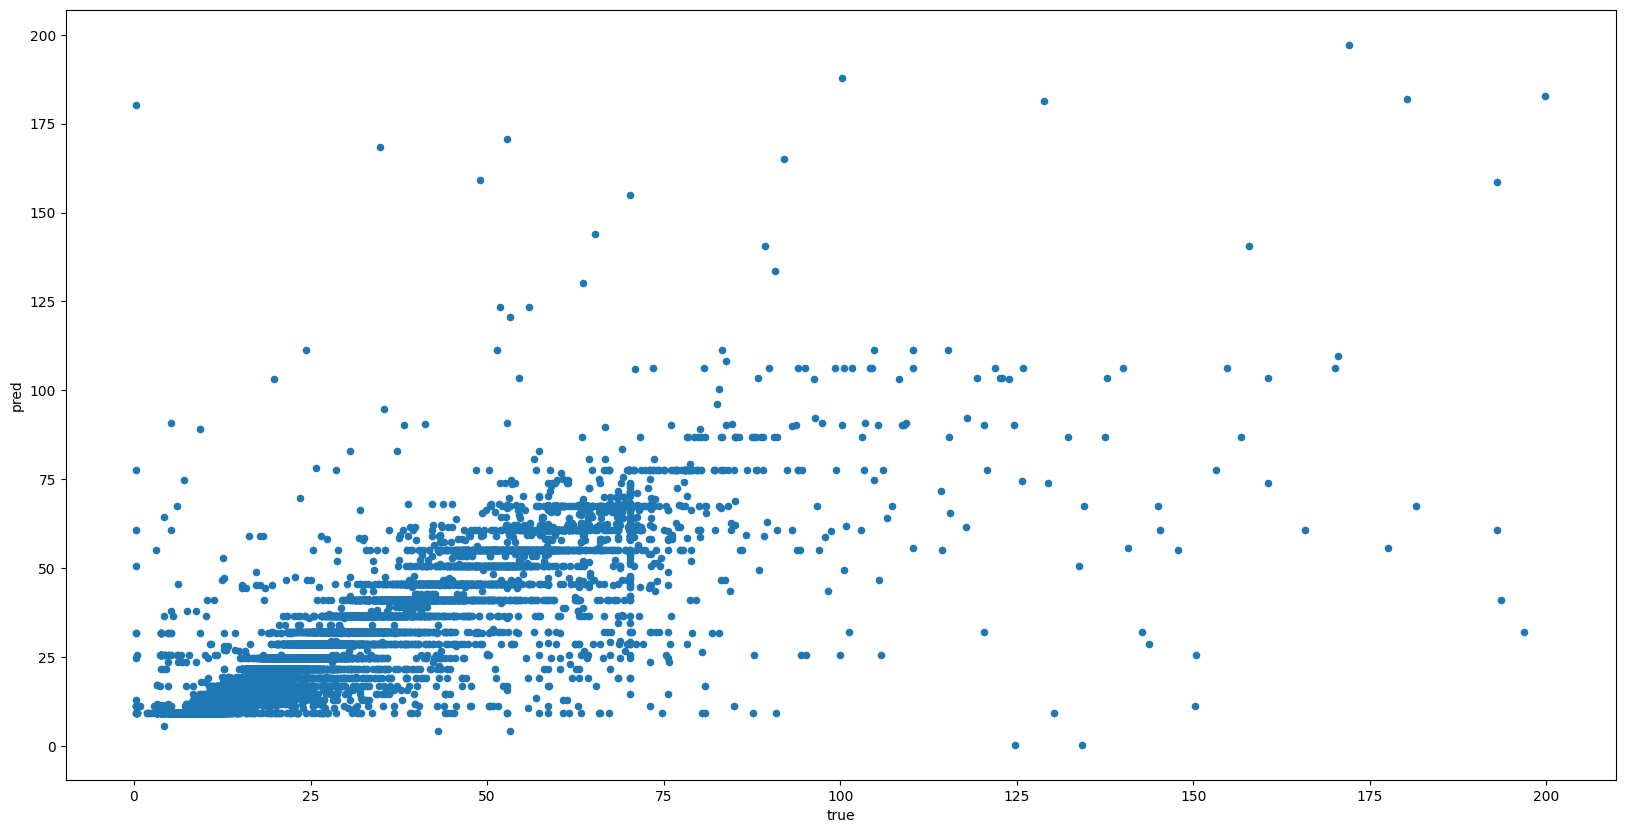

In [67]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)
results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## Fix Problems
###I will not use trip distance because we will not have the knownledge of how far a passemger will have to go before that happens

MSE:  226.6676100097577
RMSE:  15.055484383099659
MAE:  9.849364484937466
R2:  0.1853190324381967


<Axes: xlabel='true', ylabel='pred'>

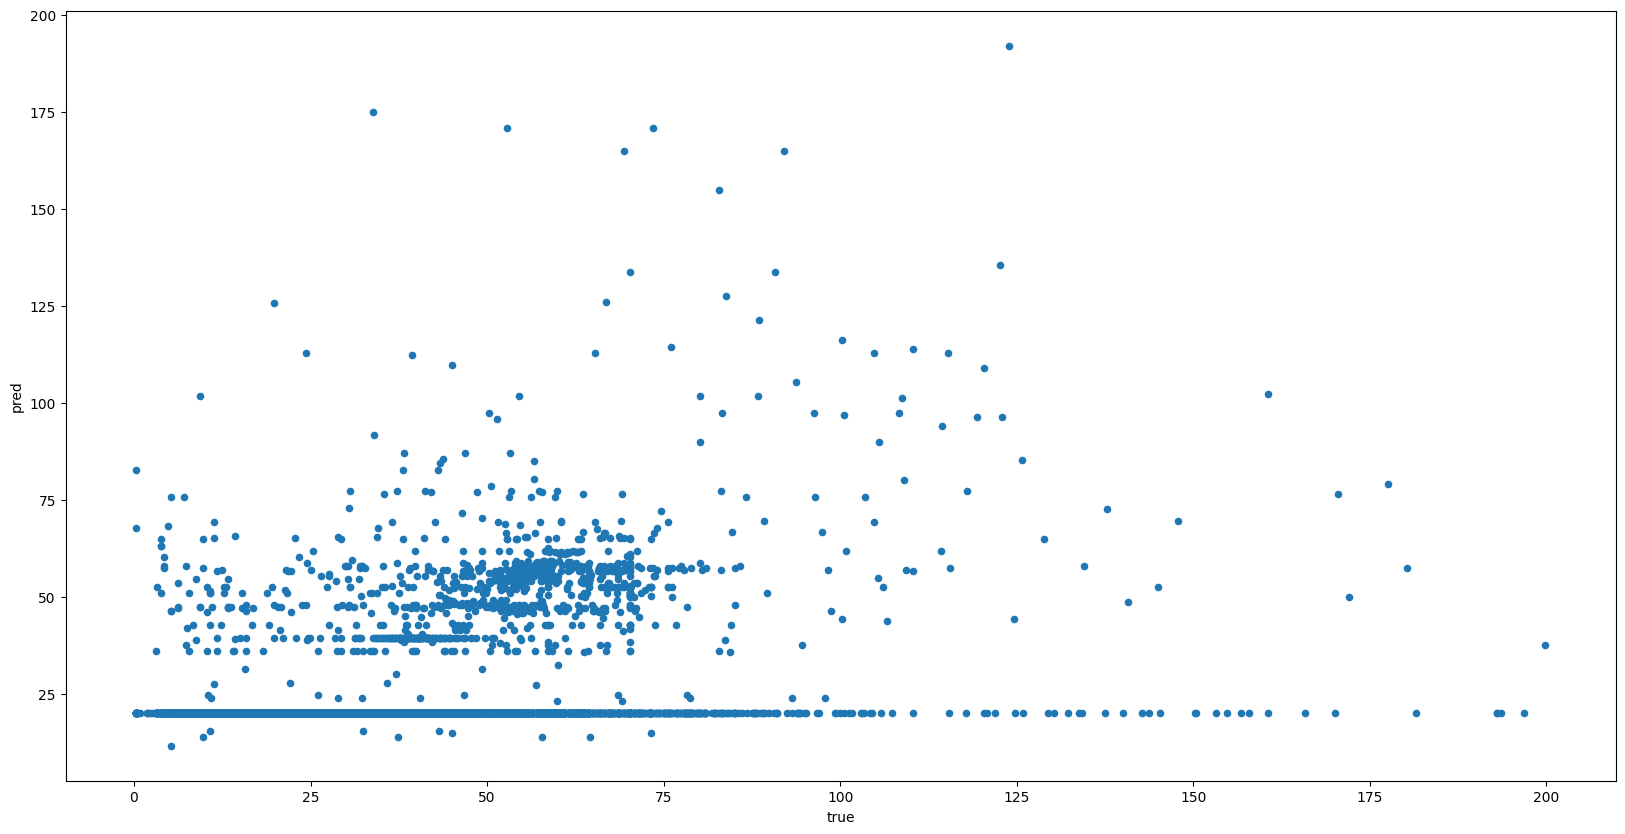

In [68]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_feature_benchmark = categorical_features_benchmark
target_feature_benchmark = 'total_amount'
# Train-test split
X_bench = data_for_benchmark_model[input_feature_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]
# one-hot encode
X_bench = pd.get_dummies(X_bench)
X_train, X_test, y_train, y_test = train_test_split(X_bench, y_bench, test_size=0.20, random_state=42)


tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)
tree_model = tree

y_pred = tree_model.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred)) # avg of the squared difference between actual and predicted values, variance of the residuals
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred))) # standard deviation of residuals, more attention to bigger errors
print('MAE: ', mean_absolute_error(y_test, y_pred)) #avg of the absolute difference between the actual and predicted values
print('R2: ', r2_score(y_test, y_pred)) #between 0 and 1, how good a model fit the pattern of the data. 1 is perfect, negative is worst than the mean, 0 is the mean

data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)
results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')